<a href="https://colab.research.google.com/github/DarshanSavaliyaOfficial/Deep-Learning/blob/master/Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Colab is to learn the basics of PyTorch.

Learning from pythonprogramming.net

### 1st code shell. 
Import necessary modules

In [24]:
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

### 2nd code shell. 
Download the training and testing dataset and transform it to tensors.

In [25]:
train = datasets.MNIST('', train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('', train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))

### 3rd code shell. 
Shuffle the dataset and divide it into the finite number of batches of 10 data in each.

In [26]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True )
testset = torch.utils.data.DataLoader(test, batch_size = 20, shuffle = False)


### 4th code shell. 
Knowing your data

In [27]:
for data in trainset:
  print(data[1])      # so Data is a batch of 10 different data and 
  break               # data[0] is the feature and data[1] is the target


tensor([7, 7, 4, 1, 8, 8, 8, 6, 9, 2])


### 5th code shell.
Printing the features as a plot(as its an image)

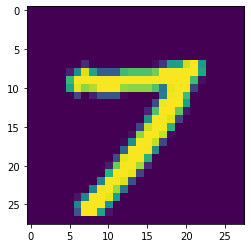

In [28]:
plt.imshow(data[0][0].view(28,28))
plt.show()


PyTorch comes with the balanced and scaled datasets but in real life, the neural networks works only on 0-1 or -1 to 1 feature values so, we need to scale our data to train NNs and also we need to balance the dataset.
Balancing means the Dataset should contain almost equal number of percentage of examples of the classes in the training stage.

### 6th code shell.
Building a Deep Network model. Importing necessary classes from torch library

In [29]:
import torch.nn as nn
import torch.nn.functional as F

### 7th code shell. 
Initializing class for Deep Network inheriting from the nn.Module class.

Class initializes the fc(fully connected) layers and then applies ReLu activation function and SoftMax function at the end.

In [51]:
class Net(nn.Module):
  def __init__(self):
    super(). __init__()
    self.fc1 = nn.Linear(28*28, 64)  # fc layer, with 28x28 input features and 64 output features 
    self.fc2 = nn.Linear(64,64)      
    self.fc3 = nn.Linear(64,64)
    self.fc4 = nn.Linear(64,10)

  def forward(self, x):
    x= F.relu(self.fc1(x))     # Connecting the layers...
    x= F.relu(self.fc2(x))     # and finally applying ReLu to the output of the layer
    x= F.relu(self.fc3(x))
    x= self.fc4(x)
    return F.log_softmax(x,dim=1)  # applying softmax to the output...
net = Net()     
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


### 8th code shell.
 As we already set up a Deep Network of 4 layers, we need to define the loss function and the optimizer. For that we import a torch class called optim...

In [52]:
import torch.optim as optim

### 9th code shell. 
Cross entropy as a loss function and Adam(Adaptive momentum) for optimization.
For one hot vectors, you can use Mean Squared Error.
For scalar classification(like ours one), you can use Cross Entropy

For optimizer, you can use Adam. There is also a **rectified Adam** in the market.
**lr** is the learning Rate. A good value to start with is $10^{-3}$ or 0.001

There is this Decaying Lr also available which takes bigger steps intially and then takes smaller steps with time.

In [53]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.001)

### 10th Code shell.

Defining Epoch. (1 Epoch = 1 full pass over a dataset).
Too few Epoch and Network will not learn accurately.
Too Large value of Epoch and your network will over fit the data.

Here, we are taking 3 epochs for now.

In [54]:
for epoch in range(0,3):
  for data in trainset:
    X,y = data
    net.zero_grad()      # set gradient to zero before loss calculation. Do it after every Epoch.
    X = X.view(-1,784)
    output = net.forward(X)
    loss = F.nll_loss(output, y)      # calcuate loss
    loss.backward()                     # apply the loss through the network parameters
    optimizer.step()                # Attempt to optimize the network parameters
  print(loss)



tensor(0.6688, grad_fn=<NllLossBackward>)
tensor(0.0388, grad_fn=<NllLossBackward>)
tensor(0.0166, grad_fn=<NllLossBackward>)
